# Library Importing

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Variable Declaration

In [65]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

# Data Loading

In [66]:
dataset = ft.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATHCH_SIZE
)

Found 2152 files belonging to 3 classes.


# Assign Class name

In [67]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [68]:
len(dataset)

68

In [69]:
for image_batch, lable_batch in dataset.take(1):
    
    plt.imshow
    
    print(image_batch[0].shape)

(256, 256, 3)


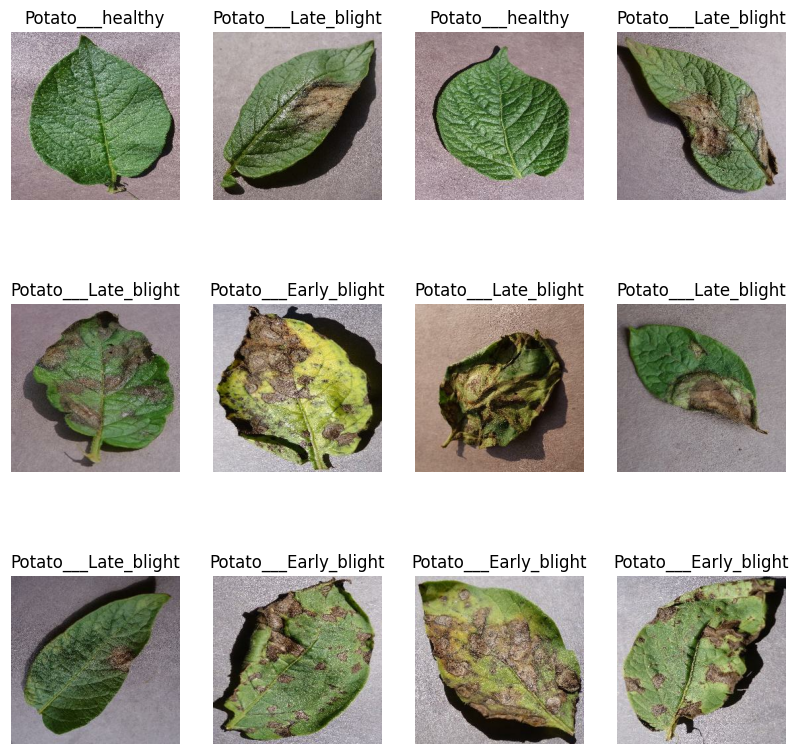

In [70]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [71]:
len(dataset)

68

# MODEL TRANNING


In [72]:
train_size = 0.8

In [73]:
len(dataset)*train_size

54.400000000000006

In [74]:
train_ds = dataset.take(54)

In [75]:
len(train_ds)

54

In [76]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [77]:
valid_size = 0.1
len(dataset)*valid_size

6.800000000000001

In [78]:
valid_ds = test_ds.take(6)

In [79]:
len(valid_ds)

6

In [80]:
valid_ds = test_ds.skip(6)
len(valid_ds)

8

In [81]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [82]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [83]:
len(train_ds)

54

In [84]:
len(val_ds)

6

In [85]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [91]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/225),
])

In [92]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [93]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

# Compiling the model


In [97]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [100]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 109s 2s/step - loss: 0.7338 - accuracy: 0.6267 - val_loss: 0.6248 - val_accuracy: 0.7240
Epoch 2/50
54/54 [==============================] - 113s 2s/step - loss: 0.4903 - accuracy: 0.7928 - val_loss: 0.4228 - val_accuracy: 0.8438
Epoch 3/50
54/54 [==============================] - 97s 2s/step - loss: 0.2924 - accuracy: 0.8796 - val_loss: 0.2308 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 94s 2s/step - loss: 0.1816 - accuracy: 0.9329 - val_loss: 0.6354 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 89s 2s/step - loss: 0.2996 - accuracy: 0.8802 - val_loss: 0.3022 - val_accuracy: 0.8802
Epoch 6/50
54/54 [==============================] - 483s 9s/step - loss: 0.1676 - accuracy: 0.9416 - val_loss: 0.0825 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 101s 2s/step - loss: 0.1050 - accuracy: 0.9601 - val_loss: 0.0627 - val_accuracy: 0.9740
Epoch 8/50
54/54

In [101]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 291ms/step - loss: 0.0056 - accuracy: 0.9961


In [102]:
scores


[0.005614731926470995, 0.99609375]

In [103]:
history
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [104]:
history.history['loss'][:5]

[0.7338321208953857,
 0.4903002083301544,
 0.2923685312271118,
 0.1816074252128601,
 0.29963281750679016]

In [105]:
history.history['loss'][5:]

[0.16760537028312683,
 0.10495943576097488,
 0.10117597877979279,
 0.08542551100254059,
 0.04292372986674309,
 0.03125390037894249,
 0.0599348209798336,
 0.0679233968257904,
 0.039943113923072815,
 0.023360978811979294,
 0.06327307224273682,
 0.010067521594464779,
 0.004505259916186333,
 0.005498780868947506,
 0.0013048534747213125,
 0.001014264882542193,
 0.0003981506160926074,
 0.0003138605388812721,
 0.000196743625565432,
 0.00015063936007209122,
 0.0001288900093641132,
 0.00011266673391219229,
 9.851967479335144e-05,
 8.559497655369341e-05,
 7.71655177231878e-05,
 6.779969407944009e-05,
 6.179788761073723e-05,
 5.693542698281817e-05,
 5.0734270189423114e-05,
 4.533223545877263e-05,
 4.21655822719913e-05,
 3.806067616096698e-05,
 3.439499414525926e-05,
 3.2518411899218336e-05,
 2.9780829208903015e-05,
 2.7095027689938433e-05,
 2.542402762628626e-05,
 2.332300391572062e-05,
 2.1574565835180692e-05,
 2.0500077880569734e-05,
 1.8868728147936054e-05,
 1.7354839656036347e-05,
 1.68270398

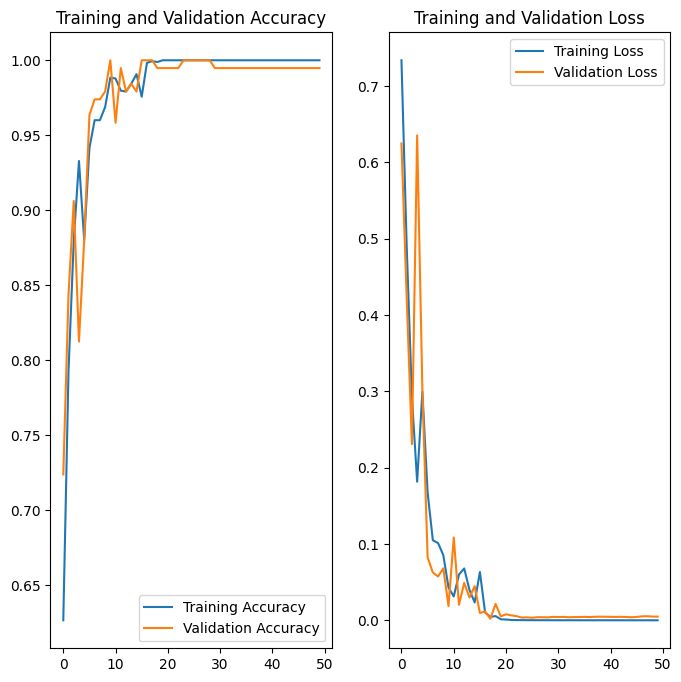

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 285ms/step
predicted label: Potato___Late_blight


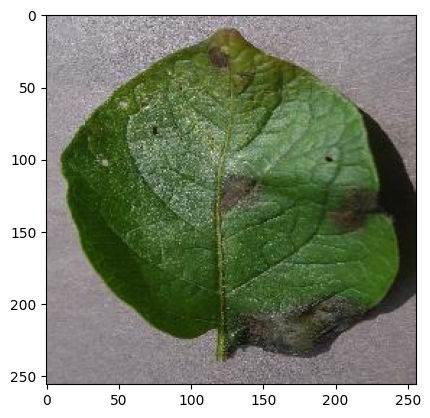

In [109]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [110]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


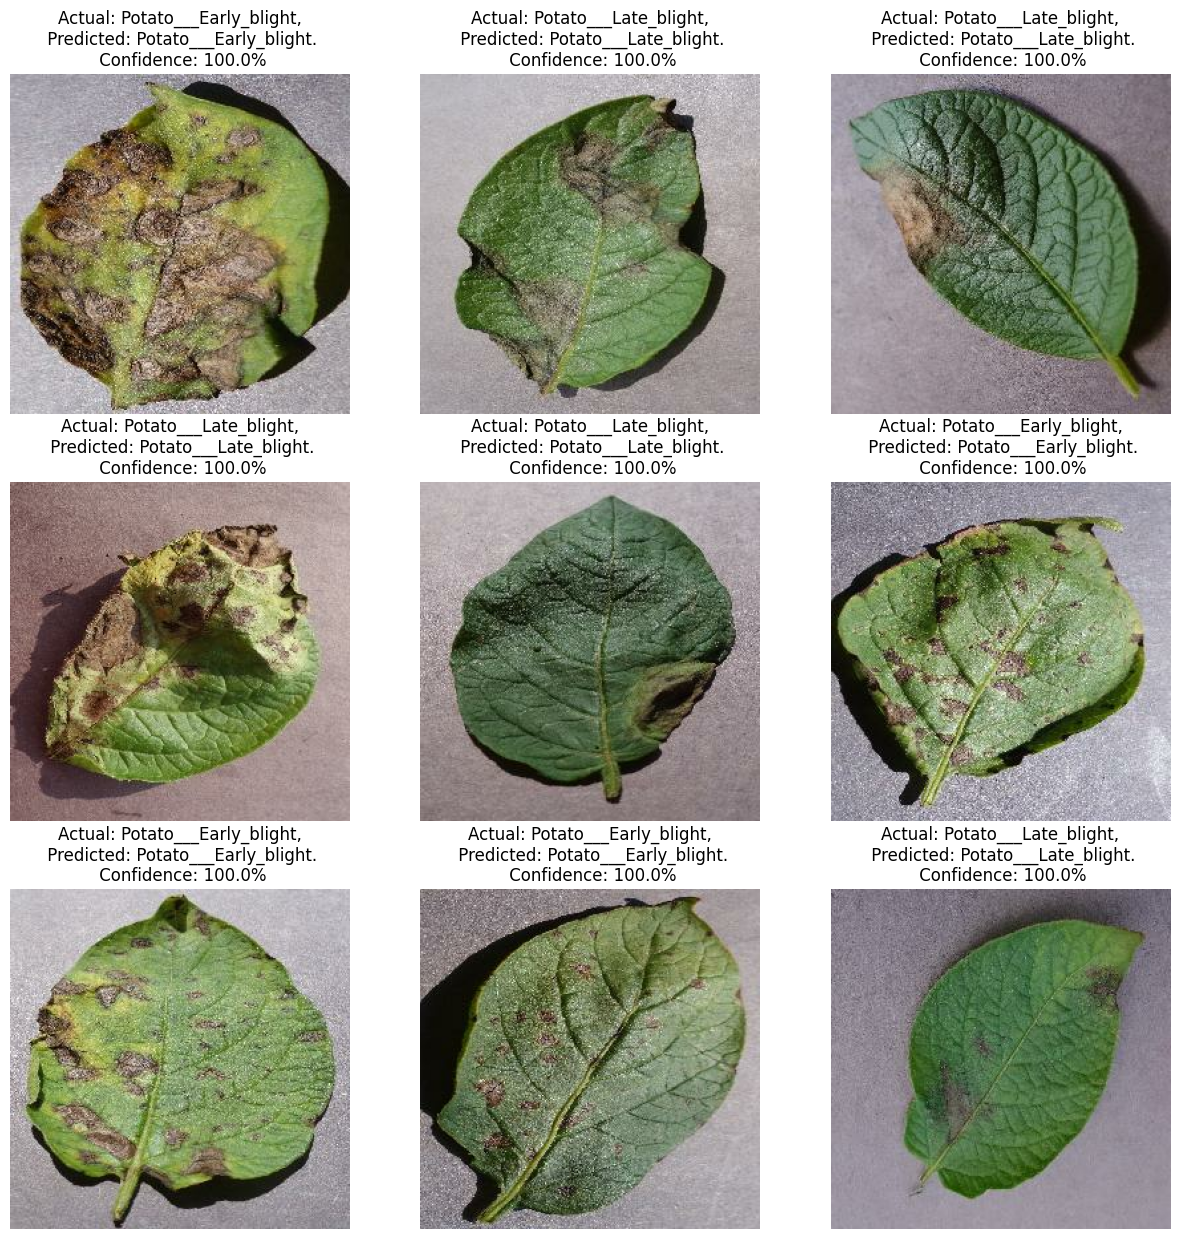

In [111]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [113]:
model.save("../potatoes.h5")

C:\Users\moksh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
model.save("../potatoes")

INFO:tensorflow:Assets written to: ../potatoes\assets


INFO:tensorflow:Assets written to: ../potatoes\assets
